<a href="https://colab.research.google.com/github/BiancaZuchinali/STARTR/blob/main/Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Este projeto tem como objetivo desenvolver um algorítmo de Machine Learning para prever o valor do preço médio das casas em Boston

In [ ]:
from google.colab import drive # esse primeiro bloco só é usado pq é o colab
drive.mount('/content/drive') ## caminho q eu vou montar o meu drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np  #importação da biblioteca matemática
import pandas as pd # biblioteca para manipulação de dados  , pd é um apelido da biblioteca q será usado no código

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/STARTR_2024/housing.csv', sep= ',', encoding='iso-8859-1') ## df é a variável que vai receber os dados, vai simbolizar o dataset(dataframe)
## read_csv é para ler as dados que estão em csv
#encoding iso-8859-1 é como se fosse a tabela asci da regressão linear

Descrição do exercício sobre Regressão Linear:

Tem-se 3 variáveis que são os três atributos previsores e um alvo que é o valor médio das casas. Também 489 linhas. Então, não é uma tabela de dados grande, pois o objetivo é comprender algoritmos de Regressão. Atributos previsores:

RM: é o número médio de cômodos entre os imóveis no bairro. É a média dos cômodos ...

LSTAT: é a porcentagem de proprietários ou de pessoas proprietárias, no bairro, considerados de "classe baixa" (proletariado).

PTRATIO: é a razão entre estudantes e professores nas escolas de ensino fundamental e médio no bairro. Quanto maior for essa razão pior e vai ter mais estudantes por professor em cada escola. Então isso é considerado ruim para o bairro.

Variável alvo:

MEDV: valor médio das casas.
Então, RM é uma média; LSTAT é uma porcentagem; PTRATIO é uma razão, ou seja, uma divisão e MEDV é Porcentagem é razão multiplicada por 100. Esse data set é bem simples, a fim de que se entenda o que será feito com os dados. Poderiam ter 50 atributos e mas a técnica é a mesma. Então, este data set tem 4 atributos.

In [ ]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [ ]:
df.shape #fornece o número do dados/registros no dataset, linhas e colunas, siginifica que temos 489 registros para as 4 "classes" de dados

(489, 4)

## **Análise, Exploração e Tratamento dos Dados**

Valores Missing (NAN) . Verificar se há valores faltantes, pois em muitos casos, isso poderá ser um problema. Neste caso, não há valores ou valor missing. Se houver foi explicado na seção anterior. Após a execução, verifica-se que todos estão com zero de valor faltante.

In [ ]:
df.isnull().sum() #vVERIFICAR ISSO AQUI AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

,0
RM,0
LSTAT,0
PTRATIO,0
MEDV,0


## **Análise dos tipos de atributos.**

Quais são eles, neste exemplo:
*   object: strings que são variáves categóricas nominais.
*   int64: inteiros que são valores inteiros, ou seja, variáveis numéricas
*   discretas ou variáveis nominais originais.
*   float64: reais, que são variáveis numéricas contínuas, ou seja, elas podem assumir qualquer valor. Ex. do atributo RM da tabela acima.
Assim como a porcentagem pode assumir qualquer valor que neste caso é o atributo LSTAT.Assim como os outros dois atributos são
variáveis contínuas. complex: complexos, são números complexos que também são classificados como variável numérica contínua.
df.dtypes # Ao rodar esse código, observa-se que todos atributos abaixo são variáveis numéricas contínuas. O float 64 são números reais

In [ ]:
df.describe() #verifica se tem algum valor numérico extranho, exemplo : RM = 0 . isso não pode acontecer
#e+02 e é o expoente de base 10, nesse caso poderia ser 4,890000 vezes 10 elevado ao quadrado
#todas as colunas tem que representar o valor médio de fato
#std é o desvio padrão
# min é o valor mínimo
#QUARTIL????????????????????

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


Análise dos outliers, ou seja, análise de cada atributo com os outliers.Outliers se referem às medidas upper fence e lower fence. Outliers são ...... Para isso vamos chamar a biblioteca gráfica abaixo plotly express

In [ ]:
#OUTLIERS:  dados descrepantes dos demais
import plotly.express as px
boxplot = px.box(df, y="RM")
boxplot.show()

In [ ]:
boxplot = px.box(df, y="LSTAT") # boxplot = nome do gráfico
# y é a a direção, eixo do gráfico
boxplot.show() #mostra o gráfico
# o spontinhos acima do gráfico são os outliers

In [ ]:
boxplot = px.box(df, y="PTRATIO")
boxplot.show()

In [ ]:
boxplot = px.box(df, y="MEDV")
boxplot.show()

# **Correlação Linear**

In [ ]:
df.head(2)
#fazemos análise aos pares, uma variável idependente com a dependente

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


Atributos previsores:

RM: é o número médio de cômodos entre os imóveis no bairro.

LSTAT: é a porcentagem de proprietários no bairro considerados de "classe baixa" (proletariado).

PTRATIO: é a razão entre estudantes e professores nas escolas de ensino fundamental e médio no bairro.

Variável alvo

MEDV: valor médio das casas

In [ ]:
import matplotlib.pyplot as plt
# primeiro passo é analisar o gráfico de dispersão

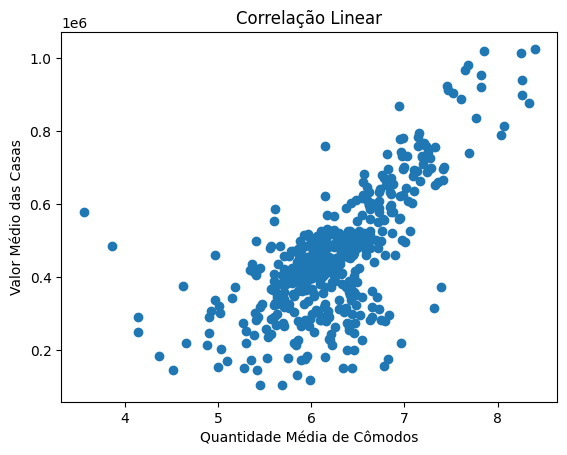

In [ ]:
plt.scatter(df.RM, df.MEDV)
plt.title("Correlação Linear")
plt.xlabel("Quantidade Média de Cômodos") #eixo x
plt.ylabel("Valor Médio das Casas") #eixo y
plt.grid(False) #coloca o grid quadriculado atrás do gráfico quando está true
# ao rodar esses comandos observa-se que temos uma correlação linear positiva crescente.
#Apesar de termos dados dispersos, no começo do gráfico, é muito claro que existe uma correlação linear positiva, isto é,
#quanto maior for a quantidade média de cômodos maior é o valor médio da casa.

Text(0, 0.5, 'Valor Médio das Casas')

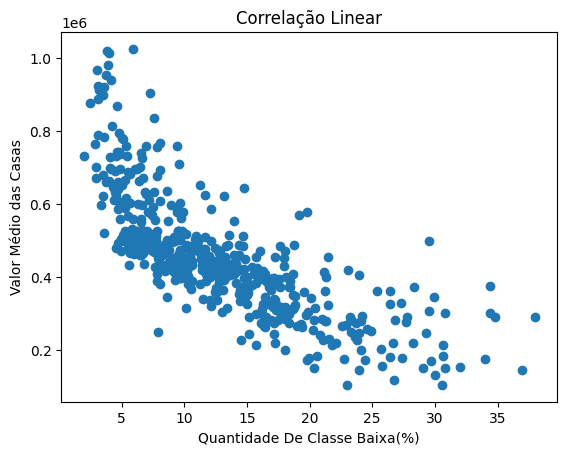

In [ ]:
plt.scatter(df.LSTAT, df.MEDV)
plt.title("Correlação Linear")
plt.xlabel("Quantidade De Classe Baixa(%)") #eixo x
plt.ylabel("Valor Médio das Casas") #eixo y
#observa-se que temos uma correlação linear negativa pois o gráfico está decrescendo

Text(0, 0.5, 'Valor Médio das Casas')

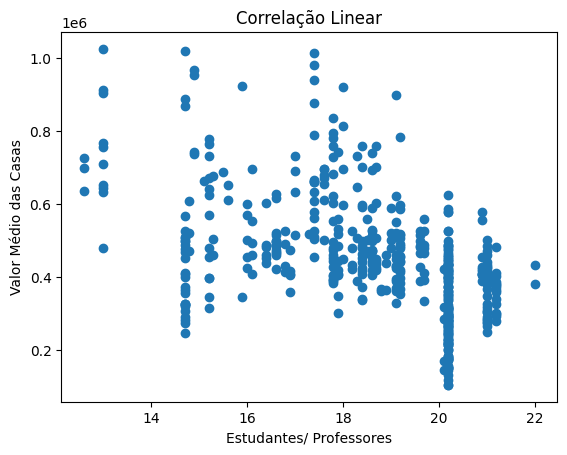

In [ ]:
plt.scatter(df.PTRATIO, df.MEDV)
plt.title("Correlação Linear")
plt.xlabel("Estudantes/ Professores") #eixo x
plt.ylabel("Valor Médio das Casas") #eixo y
#observa-se quanto maior for a quantidade de alunos por professor, teremos valores menores nas casas
#não temos uma tipo de correlação bem caracterizado, pois tem-se uma pequena e leve correlação negativa
#essa terceira grandesa é um pouco falha pois os dados são bem dispersos.
#mas qual é o nível de correlação?
#para ter certeza dessas correlações é preciso fazer um teste estatístico.
#analisa-se a normalidade. Após isso analisa-se  qual correlação será escolhida

In [ ]:
import seaborn as sns

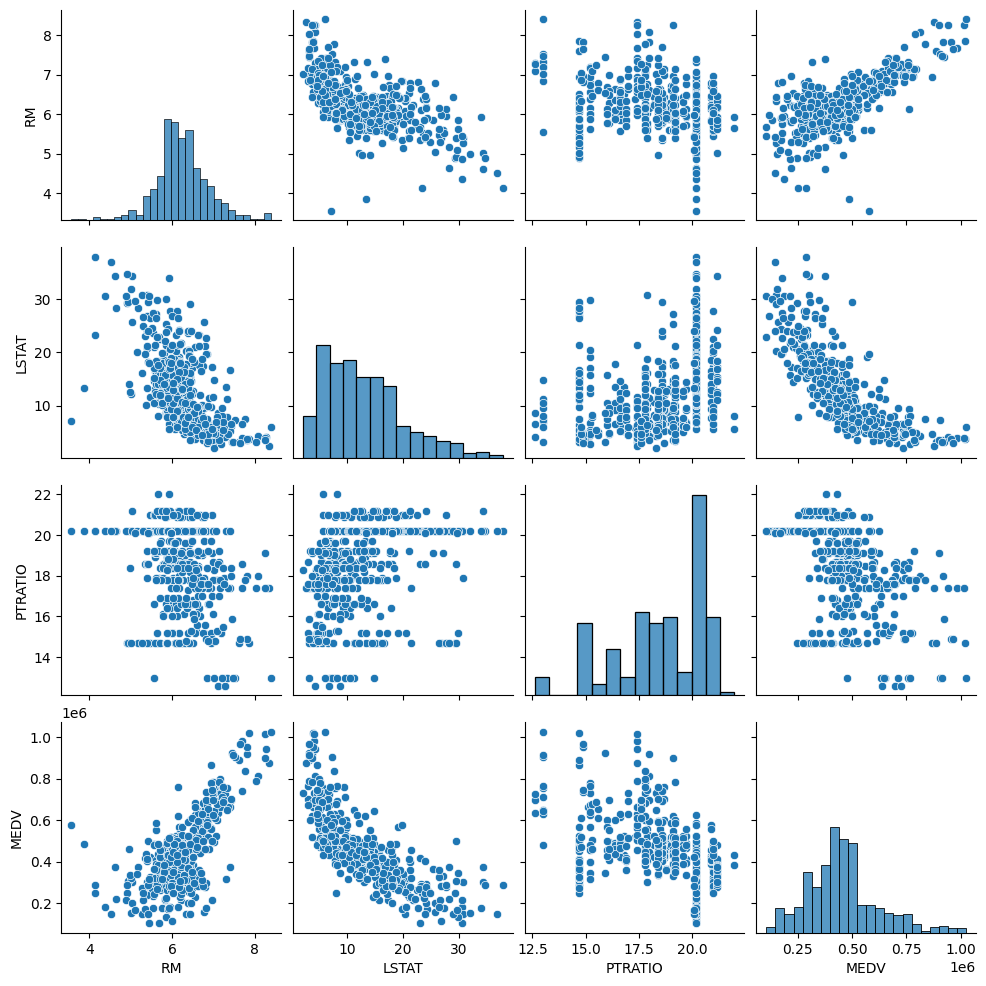

In [ ]:
sns.pairplot(df);

# **Análise da Normalidade**

A Normalização ou padronização são técnicas, frequentemente aplicadas na etapa de preparação dos dados, com o objetivo de colocá-los em um intervalo de valores comuns. A normalização é uma técnica geralmente aplicada como parte da preparação de dados para o aprendizado de máquina. O objetivo da normalização é mudar os valores das colunas numéricas no conjunto de dados para usar uma escala comum, sem distorcer as diferenças nos intervalos de valores nem perder informações. A normalização também é necessária para alguns algoritmos para modelar os dados corretamente.

Por exemplo, suponha que o conjunto de dados de entrada contenha uma coluna com valores variando de 0 a 1 e outra coluna com valores variando de 10.000 a 100.000. A grande diferença na escala dos números pode causar problemas ao tentar combinar os valores como recursos durante a modelagem.

A normalização evita esses problemas criando novos valores que mantêm a distribuição geral e as proporções nos dados de origem, mantendo os valores em uma escala aplicada em todas as colunas numéricas usadas no modelo.

Esse componente oferece várias opções para transformar dados numéricos:

Você pode mudar todos os valores para uma escala de 0–1 ou transformar os valores, representando-os como classificações de percentil em vez de valores absolutos. Você pode aplicar a normalização para uma única coluna ou em várias colunas em um mesmo conjunto de dados. Se você precisar repetir o pipeline ou aplicar as mesmas etapas de normalização a outros dados, poderá salvar as etapas como uma transformação de normalização e aplicá-la a outros conjuntos de dados que tenham o mesmo esquema. Alguns algoritmos exigem que os dados sejam normalizados antes de treinar um modelo. Outros algoritmos executam o dimensionamento ou normalização dos seus próprios dados. Portanto, ao escolher um algoritmo de aprendizado de máquina para usar na criação de um modelo de previsão, examine os requisitos de dados do algoritmo antes de aplicar a normalização aos dados de treinamento.

A Normalidade é analisada graficamente ou pelo teste estatístico. Começamos pela análise gráfica.

## **Gráfico QQ-Plot**

Uma das formas de analisar a normalidade é através do gráfico chamado de Q-Q, que significa Quantil Quantil. O gráfico QQ ou gráfico quantil-quantil, é uma ferramenta gráfica para nos ajudar a avaliar se um conjunto de dados plausivelmente veio de alguma distribuição teórica, como Normal ou exponencial.

Por exemplo, se executarmos uma análise estatística que assume que nossa variável dependente é normalmente distribuída, podemos usar um gráfico de QQ normal para verificar essa suposição.

É apenas uma verificação visual, não uma prova hermética, por isso é um tanto subjetivo. Mas nos permite ver rapidamente se nossa suposição é plausível e, caso não seja, como a suposição é violada e quais pontos de dados contribuem para a violação.

Um gráfico QQ é um gráfico de dispersão criado plotando dois conjuntos de quantis um contra o outro. Se os dois conjuntos de quantis vierem da mesma distribuição, devemos ver os pontos formando uma linha aproximadamente reta.

In [ ]:
import scipy.stats as stats #biblioteca científica para plotar o gráfico

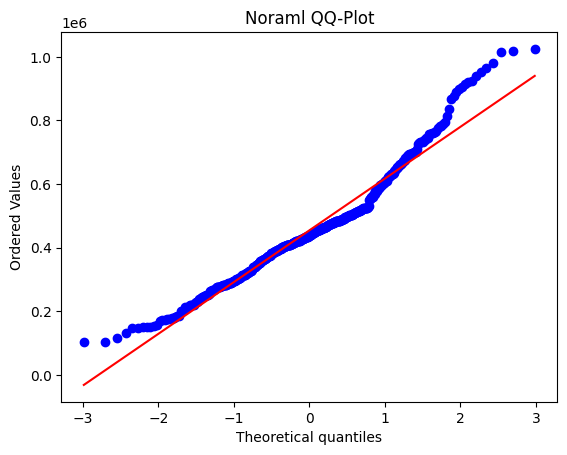

In [ ]:
stats.probplot(df['MEDV'], dist="norm", plot=plt) # para criar/plotar o gráfico
plt.title("Noraml QQ-Plot")
plt.show()
#observa-se que temos valores ordenados y no eixo, ele é nomalizado, ou seja, tem o zero para esquerda negativo e para direita o valor positivo.
#tem-se, que analisar também os pontos em azul, que são os dados, para ter uma distrubuição ele teria que estar o mais próximo possível da reta em vermelho.
#percebe-se que no inpicio e no final do gráfico tem uma leve disperção.

## **Histograma**

In [ ]:
import plotly.express as px

In [ ]:
hist = px.histogram(df, x="MEDV", nbins=60)
hist.update_layout(width=800, height= 500, title_text='Média dos Valores')
hist.show()
#para se ter uma distribuição deve ter um formato de boca de sino, simétrico, no entanto não é o que está occorentdo, na direita ocorrem bastantes imperfeições
#se formos analisar a distribuição normal, considerando o pico do histograma, há uma cauda maior a direita
#esse gráfico tende a ter uma distribuição assimétrica positiva

In [ ]:
hist = px.histogram(df, x="RM", nbins=60) # nbins se refere a largura das barras do eixo x
hist.update_layout(width=800, height= 500, title_text='Quantidade de Cômodos')
hist.show()
#ele possui uma cauda dos dois lados
#do lado direito ele apresenta uma melhora em relação ao interior
#não está simétrico ainda e o puco apresenta falhas, bem como no lado esquerdo

In [ ]:
hist = px.histogram(df, x="LSTAT", nbins=60)
hist.update_layout(width=800, height= 500, title_text='Quantidade de classe baixa (%)')
hist.show()
#não há uma distribuição simétrica, longe de uma distribuição normal

In [ ]:
hist = px.histogram(df, x="PTRATIO", nbins=60)
hist.update_layout(width=800, height= 500, title_text='Média dos Valores')
hist.show()
#está bem diferente da distribuição normal

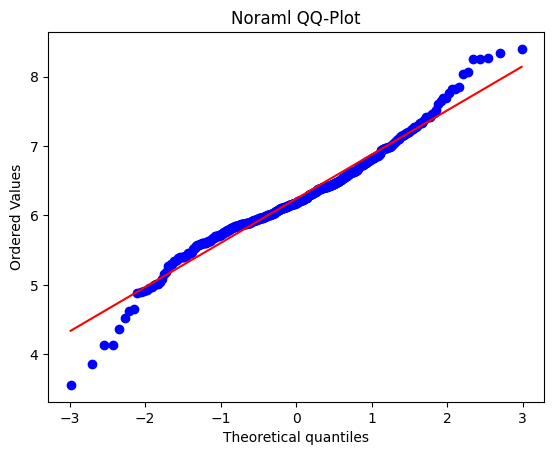

In [ ]:
stats.probplot(df['RM'], dist="norm", plot=plt) # para criar/plotar o gráfico
plt.title("Noraml QQ-Plot")
plt.show()
#A parte central está boa, é semelhante ao do MEDV, ela mantém o agrupamento, no entando nas laterais há uma dispersão, os pontos estão um pouco longe da reta vermelha, que é a nossa referência

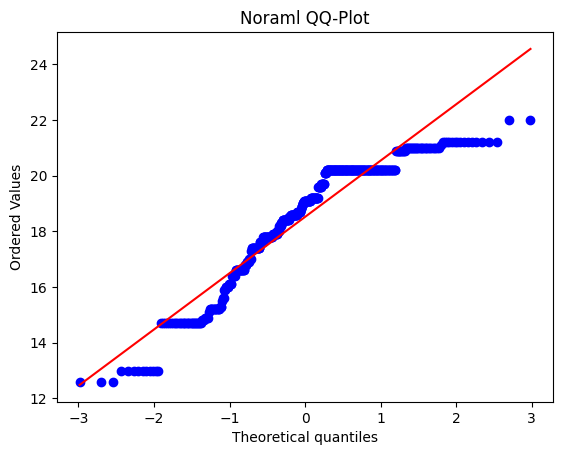

In [ ]:
stats.probplot(df['PTRATIO'], dist="norm", plot=plt) # para criar/plotar o gráfico
plt.title("Noraml QQ-Plot")
plt.show()
# o gráfico qq não apresenta nada pois há muitas falhas,  os pontos em azul estão muito distantes da linha vermelha que é nossa referência
#parwa essa variável o grafico qq não está nos ajudando na análise

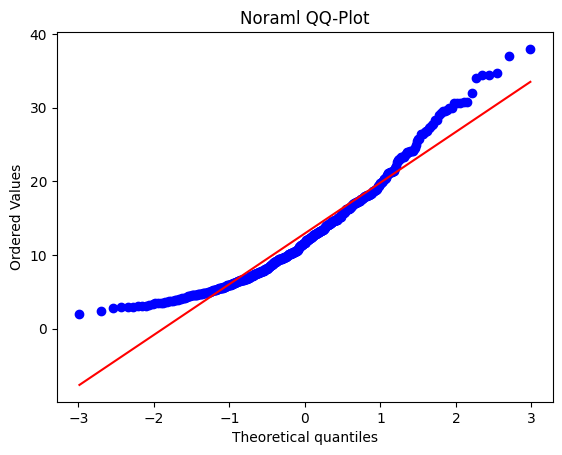

In [ ]:
stats.probplot(df['LSTAT'], dist="norm", plot=plt) # para criar/plotar o gráfico
plt.title("Noraml QQ-Plot")
plt.show()

# **Teste De Shapiro-Wilk**

É um teste para verificar a normalidade de uma distribuiçã de dados. Nesse teste estatístico, trabalhamos com duas hipóteses:


*   Ho/ H0: é uma hipótese nula
*   Ha: é uma hipótese alternativa

É utilizado para até 5000 registros. Possui uma limitação: H0 recebe p > 0,05. A hipótese nula indica que a distribuição é normal, isso indica que a característica dessa variável estatistica for menor ou igual a 0,05 (p<=0,05) quando isso ocorre temos uma distribuição diferente da normal, eu tenho o Ha. A hipótese alternativa contradiz a hipótese nula, pois a distribuição é diferente da normal. p: probabilidade.


In [ ]:
stats.shapiro(df['RM'])
# o valor que nos interessa é o segundo(o pvalor)
#nesse caso não é uma distribuição normal, pois ele tem como resultado um número menor que 0,05
# seria a hipótese alternativa

ShapiroResult(statistic=0.9708170375303297, pvalue=2.7090145811327798e-08)

In [ ]:
stats.shapiro(df['MEDV'])
#também é uma distribuição não normal, pois o resultado é muito menor que 0,05

ShapiroResult(statistic=0.9596616055953767, pvalue=2.5759801704018553e-10)

In [ ]:
estatistica, p = stats.shapiro(df['RM'])
print('A estatística de teste {}'.format(estatistica))
print('O valor de p é {}'.format(p))

A estatística de teste 0.9708170375303297
O valor de p é 2.7090145811327798e-08


In [ ]:
estatistica, p = stats.shapiro(df['LSTAT'])
print('A estatística do teste é {}'.format(estatistica))
print('O valor de p é {}'.format(p))
#ficamos na dúvida graficamente. no confronto com o teste estatístico o p valor evidencia que a distribuição não é normal

A estatística do teste é 0.9371757140975832
O valor de p é 1.689879707182205e-13


In [ ]:
estatistica, p = stats.shapiro(df['PTRATIO'])
print('A estatística do teste é {}'.format(estatistica))
print('O valor de p é {}'.format(p))
#ao executar o teste vemos q o pvalor é menor que 0,05 logo a distribuição não é normal

A estatística do teste é 0.90647424903615
O valor de p é 9.064596547331122e-17


o estudo teve como objetivo ensiar a ver qual o teste a ser utilizado

# **Teste de Lilliefors**

Como o teste anterior (Shapiro-Wilk), temos o teste Lilliefors para mais de 5000 registros.(Os registros são as linhas). As regras das hipóteses são as mesmas.

In [ ]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [ ]:
estatistica,p = statsmodels.stats.diagnostic.lilliefors(df.RM,  dist = 'norm')
print('Estatistica de teste {}'.format(estatistica))
print('O valor de p é {}'.format(p))
#distribuição não normal, logo peloa 4 testes realizados: teste de lilliefors, teste de shapiro-wilk, teste pelo histograma e teste pelo gráfico QQ, Confirma-se que nunhum desses atributos tem distribuição normal.

Estatistica de teste 0.06394344399233598
O valor de p é 0.0009999999999998899


In [ ]:
estatistica,p = statsmodels.stats.diagnostic.lilliefors(df.MEDV,  dist = 'norm')
print('Estatistica de teste {}'.format(estatistica))
print('O valor de p é {}'.format(p))
#distribuição não normal

Estatistica de teste 0.11370576407672117
O valor de p é 0.0009999999999998899


# **Análise da Correlação Linear** (Entre as grandezas)


Sabe-se que existe uma correlação entre as grandezas, tendendo ao positivo e negativo, mas qual o nível?
Para isso usam-se os testes abaixo.

*   Pearson ( Distribuição Normal )
*   Spearman ( Distribuição Não Normal ou Teste Não Paramétrico)
*   Kendall ( Distribuição Não Normal com quantidade pequena de amostras, menor que 30 )






In [ ]:
coef,p = stats.spearmanr(df.MEDV, df.RM) #variavel predisora com a variável alvo
print('Coeficiente de relação: {}'.format(coef))
print('O valor de p é {}'.format(p))
#vê se a média ente o valor das casas e entre o valor médio dos cômodos, rodando verifica-se a correlação de 0,62 enquanto a de pearson deu 0,69. mas a que nos interessa é a de spearman.
#Com esse teste há uma correlação rasoável, de 0,62 entre o número de cômodos e a média.( deu positivo )
#Conclusão: temos uma correlção linear positiva de 0,62 (rasoável) (} o número não pe mais rasoável se fosse de 0,5 e alguma coisa para baixo)

Coeficiente de relação: 0.6240572939087418
O valor de p é 3.845028634343325e-54


In [ ]:
coef,p = stats.pearsonr(df.MEDV, df.RM) #variavel predisora com a variável alvo
print('Coeficiente de relação: {}'.format(coef))
print('O valor de p é {}'.format(p))

Coeficiente de relação: 0.6972092210185156
O valor de p é 2.0533141149513303e-72


In [ ]:
coef,p = stats.kendalltau(df.MEDV, df.RM) #variavel predisora com a variável alvo
print('Coeficiente de relação: {}'.format(coef))
print('O valor de p é {}'.format(p))
#nesse caso esse teste não nos interessa

Coeficiente de relação: 0.4724931551110662
O valor de p é 9.983146011545424e-55


In [ ]:
coef,p = stats.spearmanr(df.MEDV, df.LSTAT) #variavel predisora com a variável alvo
print('Coeficiente de relação: {}'.format(coef))
print('O valor de p é {}'.format(p))
# o p valor deu menor que 0,05 ou seja , tem correlação e forte de -0,84.
# quanto maior a quantidade de trabalhadores da classe baixa maior o carrelação negativa. É inversamente proporcional.

Coeficiente de relação: -0.8455267494054259
O valor de p é 8.25183845003003e-135


In [ ]:
coef,p = stats.spearmanr(df.MEDV, df.PTRATIO) #variavel predisora com a variável alvo
print('Coeficiente de relação: {}'.format(coef))
print('O valor de p é {}'.format(p))
#em relação a razão estudante professor, observa-se que ela resulta num p-valor menor que 0,05, mostrando que existe uma correlação e ela é negativa, ou seja, quanto maior a quantidade de alunos na sala menor é o valor das casas da região.
#no entanto, é uma correlação fraca, não é uma grande correlação porém ela exite.

Coeficiente de relação: -0.5592761164167336
O valor de p é 1.3794858687631326e-41


In [ ]:
correlacoes = df.corr(method='spearman')
correlacoes
#Outra forma de verificar é usando esse teste, quando se coloca o parâmtro df, faz-se correlação entre todas as variáveis.
# A variável que temos que analisar e realcionar é MEDV. Então, MEDV com a variável independente, por exemplo RM, há uma correlação de 0,62 ou 62%.
# Já com LSTAT, isso é a porcentagem de moradores de classe baixa, a correlação é baixa, a correlação é negativa e forte de -0,85.
#Conforme o esperado, a correlação entre estudante e professor(PTRATIO) é uma correlação negativa, porém fraca com -0,56.

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.624700,-0.282053,0.624057
LSTAT,-0.624700,1.000000,0.461739,-0.845527
PTRATIO,-0.282053,0.461739,1.000000,-0.559276
MEDV,0.624057,-0.845527,-0.559276,1.000000


## **Mapa de Calor**

É uma maneira visual de apresentar os dados de pesquisa ou predição de interesse. Um mapa de calor em si é mais uma forma de apresentação de dados, assim como os gráficos em todas as suas variações e os diagramas. Mapas de calor utilizam paleta de cores de quente a fria, a fim de apresetar os valores quantitativos de altos a baixos, das informações coletadas.

<Axes: >

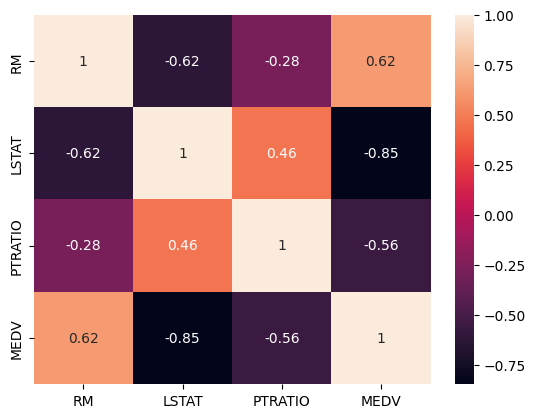

In [ ]:
plt.figure()
sns.heatmap(correlacoes, annot=True)
# conclui-se que quanto maios próximo do lartanja claro, maior será a correlação positiva. Quanto mais tende ao escuro, maior é a correlação negativa.
# Como está sendo feita uma análise de correlação entre as variáveis dependentes com a variável independente(medv), deve-se observar a última linha do mapa de calor.
# Então, por exemplo, ve-se que o valor 0,62 etá no nível com RM. LSTAT com -0,85 com cor mais escura. Logo correlação negativa maior. PTRATIO com -0,56 mais correlacionado negativamente.
#existe correlação da média dos valores das casas com todas as outras variáveis, todos os nossos atributos previsores. Olhando uma a uma percebe-se que existe correlação pegando como referência a variável MEDV que é o valor médio das casas.
# Em todas as situações, umas mais fracas e outras mais fortes, mas existe correlação.
#iso é ótimo, pois quando se for criar outro modelo, é possível usar as três variáveis juntas, com regressão linear múltipla. no momento, aplicaremos a regressão linear simples através do valor médio das casas, uma a uma comparando comparando com cada uma das variáveis.


# **Regressão Linear Simples**

É uma técnica de análise de dados que prevê o valor de dados desconhecidos, usando outro valor de dados relacionado e conhecido. Ela modela matemáticamente, a variável desconhecida ou dependente e a variável ou independente como uma equação linear. O Objetivo de estudar a regressão linear é verificar a correlação entre as grandezas para depois aplicar essas grnadezas.

No mapa de calor, a melhor correlação de resultados foi o LSTAT. Provavelmente com isso, o LSTAT dará o melhor resultado de regressão. Mesmo que seja uma correlação negativa foi a maior. Para ter isso(fazer a regressão linear) precisa-se fazer as 3 regressões? não necessariamente, pois pode se fazer somente a melhor. Mas é possível fazer das outras para comparar.

Primeiramente, verifique-se o valor médio (MEDV) em função do npumero de cômodos (RM).

In [ ]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [ ]:
x1 =  df.iloc[:,0:1].values
x1
#x1 será o RM (número médio de cômodos)
# x é a variável independente, que pegará todas as linhas localizadas por indicio pelo método iloc, os dois pontos indicam que ser quer pegar todas as linhas. [0:1] indica que pegará a coluna 0 até um. quando se pega untervalos, exemplo 0:1, se pega a última coluna, a coluna 1 nesse caso ela é excluída.
# então, somente será considerada a coluna 0, que é a primeira coluna, a do RM.
# O .values é para mostrar o resultado em formato de matriz, array de duas dimensões.

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [ ]:
y = df.iloc[:,3].values
y
# agora precisa-se da variável dependende, que é o atributo alvo. Então, implementa com esse comando representando apenas que se quer apenas uma coluna. Nesse caso a coluna 3
# ou seja, não é preciso implementar na forma de intervalo, isso porque se quer a variável alvo. Uma dimensão é o suficiente.
# os valores estão um na seuqêcia do outro, pois y é um array de uma dimensão. Essa é a diferença e é preciso que essas variáveis estejam nesses formato de arrays.
# se eu não usar um intervalo a saida sempre será um array de uma dimensão.

array([ 504000.,  453600.,  728700.,  701400.,  760200.,  602700.,
        480900.,  569100.,  346500.,  396900.,  315000.,  396900.,
        455700.,  428400.,  382200.,  417900.,  485100.,  367500.,
        424200.,  382200.,  285600.,  411600.,  319200.,  304500.,
        327600.,  291900.,  348600.,  310800.,  386400.,  441000.,
        266700.,  304500.,  277200.,  275100.,  283500.,  396900.,
        420000.,  441000.,  518700.,  646800.,  732900.,  558600.,
        531300.,  518700.,  445200.,  405300.,  420000.,  348600.,
        302400.,  407400.,  413700.,  430500.,  525000.,  491400.,
        396900.,  743400.,  518700.,  663600.,  489300.,  411600.,
        392700.,  336000.,  466200.,  525000.,  693000.,  493500.,
        407400.,  462000.,  365400.,  438900.,  508200.,  455700.,
        478800.,  491400.,  506100.,  449400.,  420000.,  436800.,
        445200.,  426300.,  588000.,  501900.,  520800.,  480900.,
        501900.,  558600.,  472500.,  466200.,  495600.,  6027

In [ ]:
from sklearn.model_selection import train_test_split  #Importa a biblioteca para separar os dados de trino e os dados de teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x1, y, test_size = 0.3, random_state = 10) # x1 é a variável independete e y é a dependente VER OS NOMES CERTOS DAS COISAS QUE ESTÃO NOS SLIDES
# deixar para teste 30% e o estado randômico de 10, poderia ser outro valor no lugar desse 10

In [ ]:
#quantidade deixada para treino tanto no x_treino quanto no y_treino
x_treino.shape, y_treino.shape
#temos, na saída, uma matriz e um vetor uniderecional, faz sentido pq temos mais de uma variável independente e uma única dependente

((342, 1), (342,))

In [ ]:
x_teste.shape, y_teste.shape

((147, 1), (147,))

In [ ]:
#fazendo o import do método de regrressão linear
#após a separação de dados é preciso treinar o modelo:
from sklearn.linear_model import LinearRegression

In [ ]:
reg_linear1 = LinearRegression() #verfica que o nome do nosso modelo regresso é reg_linear1
reg_linear1.fit(x_treino, y_treino) #treinamos esses dados com o método fit
#nesse caso estamos treinando o modelo com uma variável independente por vez

LinearRegression()

In [ ]:
#intercept é o coeficiente linear
#do treinamento, são extraídos dois vaores importantes para termons uma equação pois regressão linear é formada por uma equação
#primeiro obtemos o intercept através de reg_linear1 treinado anteriormente
reg_linear1.intercept_
# o valor obtido é o coeficiente linear obtido matemáticamente

-626510.2699464143

In [ ]:
#coeficiente angular (sempre pensando na fórmula da regressão linear)
reg_linear1.coef_
# é um array pq temos uma tabela de dados

array([173771.45170999])

## Equação valor:  -626510.2699464143 + 173771.45170999 * numeros_comodos

Dessa forma se consegue montar uma equação, onde y é o valor médio das casas que é igual ao intercept mais o coeficiente angular vezes o número de cômodos. Colocando-se o npumero de cômodos obtemos o valor médio das casas.


In [ ]:
reg_linear1.score(x_treino, y_treino) # obtém o coeficiente de determinação para os dados de treino, que é o r^2
# ao executar, obtemos o valor de 46,37% que é um valor até baixo para o nosso modleo
# é um valor baixo do treino, se fose para todas as variáveis independente teria que ter dado um valor mais alto, claro que utilizando outros métodos para soma dos valores e etc

0.46368351515551953

In [ ]:
#agora estamos verificando o coeficiente de determinação para os dados de teste
#para modelos de classificação verificamos a acurácia. Já para modelos de regressão, medimos pelo score, que é o r^2
reg_linear1.score(x_teste, y_teste)
# ao executar, o valor para teste deu 54,6%. os dados de teste deram melhores mas ainda baixos
#idealmente queremos acima de 80|%

0.5426573915930195

In [ ]:
previsores_treino = reg_linear1.predict(  x_treino  )
previsores_treino
#foi criada uma variavel a fim de termos todas as previsões para esse nosso algorítmo, usando os dados de treino
#temos então, todos os dados de treino previstos

array([551833.94409904, 468423.64727824, 647755.78544295, 658182.07254555,
       586414.46298932, 464600.67534062, 395265.86610833, 229487.901177  ,
       441141.52935977, 424980.78435074, 523161.65456689, 432105.41387085,
       555135.60168153,  44768.84800928, 504915.65213734, 424285.6985439 ,
       565735.66023583, 607962.12300136, 455912.10275512, 442531.70097345,
       505784.50939589, 450003.87339698, 410210.21095539, 390226.49400874,
       472767.93357099, 809884.54988837, 401174.09546647, 639762.29866429,
       465817.07550259, 491882.79325909, 437318.55742215, 416813.52612037,
       413164.32563446, 560870.05958796, 396134.72336688, 459561.30324103,
       335488.4867201 , 521423.94004979, 441315.30081148, 630899.95462708,
       452262.90226921, 557915.94490889, 437144.78597044, 391616.66562242,
       525420.68343912, 459735.07469274, 397872.43788398, 492925.42196935,
       387619.92223309, 533240.39876607, 487538.50696634, 608483.43735649,
       832822.38151409, 4

In [ ]:
import matplotlib.pyplot as plt
#criar um gráfico de disperção usando dados de treino

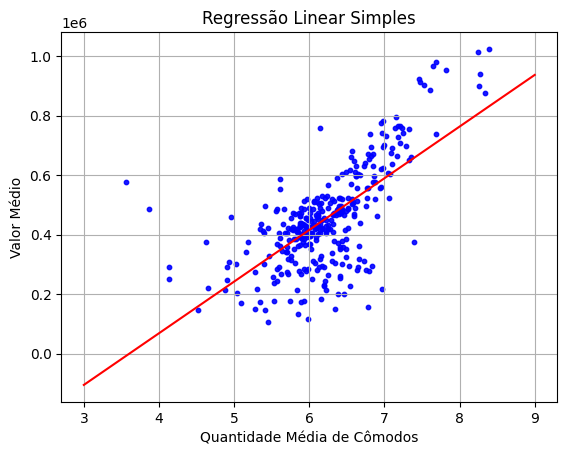

In [ ]:
plt.scatter(y=y_treino, x=x_treino, color = 'blue', s = 10, alpha = 0.9)
X_plot = np.linspace(3,9) # no espaço de 3 a 9 que é perto do valor mínimo e do valor máximo de número de cômodos, será o eixo X do gráfico
plt.plot(X_plot, X_plot*reg_linear1.coef_ + reg_linear1.intercept_, color = 'r') # equação valor citada acima, e pega o valor do exio x do intervalo e multiplica-se pela regressão linear.  o intercepto está na cor vermelha
plt.title('Regressão Linear Simples')
plt.xlabel('Quantidade Média de Cômodos')
plt.ylabel('Valor Médio')
plt.grid(True)
plt.show()
# X_treino na cor azul
#s é o tamanho da bolinha do gráfico e alpha é a nitidez da cor
# ao rodar pbserva-se que em vermelho no grafico é o nosso modelo, é a reta ajustada seguindo o nosso modelo. O gráfico mostra um coeficiente de determinação baixo de treino e teste. Isso foi feito com os dados de treino, agora faremos com os dados de teste.

In [ ]:
previsores_teste = reg_linear1.predict(x_teste)
previsores_teste

array([419593.86934773, 438187.4146807 , 447744.84452475, 480935.19180136,
       491013.93600054, 494836.90793816, 563650.40281531, 438187.4146807 ,
       500745.1372963 , 482151.59196333, 452436.67372092, 452784.21662434,
       585719.37718248, 394744.5517532 , 321239.22767988, 442705.47242516,
       458171.13162735, 446702.21581449, 442357.92952174, 488581.1356766 ,
       592322.69234746, 244432.24602406, 412816.78273104, 540365.02828618,
       421331.58386483, 554092.97297127, 470856.44760218, 369373.91980354,
       732382.48242572, 411947.92547249, 484758.16373898, 514646.8534331 ,
       565561.88878412, 438534.95758412, 661483.73012804, 452957.98807605,
       579984.91927605, 402911.80998357, 351475.46027742, 537063.37070369,
       491535.25035567, 490145.07874199, 637503.26979206, 512735.36746429,
       722825.05258167, 631768.81188563, 489971.30729028, 353039.40334281,
       471551.53340902, 466512.16130943, 446007.13000765, 384492.03610231,
       390747.80836387, 3

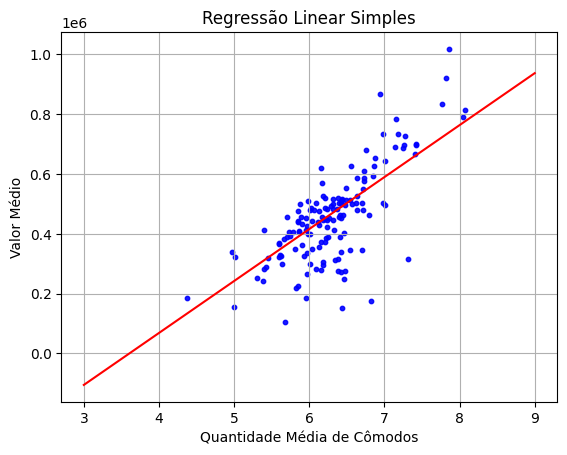

In [ ]:
plt.scatter(y=y_teste, x=x_teste, color = 'blue', s = 10, alpha = 0.9)
X_plot = np.linspace(3,9)
plt.plot(X_plot, X_plot*reg_linear1.coef_ + reg_linear1.intercept_, color = 'r')
plt.title('Regressão Linear Simples')
plt.xlabel('Quantidade Média de Cômodos')
plt.ylabel('Valor Médio')
plt.grid(True)
plt.show()

### Previsões para valores distintos

In [ ]:
valor_casa = reg_linear1.predict([[4]])
valor_casa
# a variável valor_casa recebe a regressãp linear1
# executa-se para verificar se a casa tem nove cômodos, o valor da casa previsto por esse modelo é esse valor grande 937432.79544351
# altera-se o valor dos colchetes para 10 e executa obtem- se um valor maior 1111204.2471535
# quando coloca-se o valor 5 ele diminui para 242346.98860354
# quando coloca-se o valor 3 ele dimiui a ponto de ser negativo e tem-se certeza que o coeficiente linear está correto
# viu-se que o coeficiente de determinação deu um pouco baixo e se tem um problema de previsão com , 1, 2 ou 3 cômodos tem -se um valor negativo, o coeficiente  está certo em termos de fóremula mas em termos de análise fica estranho um número negativo

array([68575.53689355])

## Métricas de Desempenho


*   Erro absoluto (abs)
*   Erro médio absoluto
*   Erro quadrático médio
*   Raiz do erro quadrático médio





In [ ]:
abs(y_teste - previsores_teste).mean()
# esse errro consiste da diferença entre y_teste e previsores_teste. O erro absoluto aceita apenas valores positivos
# o método mean() significa que teremos a média do erro absoluto, o mean é de média.
# observar que se o y_teste for menor que previsores_teste dará um número negativo, mas não se considera. é sempre a diferença do maior pro menor

76063.99733079868

In [ ]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
# é uma biblioteca para determinar o erro médio absoluto e erro quadrático médio

In [ ]:
mean_absolute_error(y_teste, previsores_teste)
# a sigla do erro médio absoluto (MAE)
# é calculado a partir da média dos erros absolutos, ou seja, utiliza-se o módulo de cada erro para evitar a substimação do erro, pis o valor é menos afetados por pontos especialmente extremos, como os outliers

76063.99733079868

In [ ]:
# erro quadrático médio
mean_squared_error(y_teste, previsores_teste)
# sempre comparando os dois, isto é, o resultado previsto com o resultado real. Esse valor é alto pois é o quadrado.

11294624525.740473

In [ ]:
# raiz do erro quadrático médio
np.sqrt(mean_squared_error(y_teste, previsores_teste))
# a partir do resultado do erro quadrático médio, pode-se extrair a raiz dele, ou seja, teremos a raiz do erro quadrático médio. quer dizer que, se extrair a raiz de 11294624525.740473 teremos a raíz do erro quadrático médio.
# analisando os dois resultados (a raiz quadrática média e o erro quadratico médio) a raiz do erro quadrático médio  é usada para comparar com outros modelos então, foi criado o algoritmo para regressão linaer para o valor médio das casas em função do número de cômodos.
# foi feito um modelo de regressão linear para as duas variáveis (MEDV e a RM) .

106276.17101561607

Valor Médio (MEDV) em função da classe social ( LSTAT)

O objetivo é criar um outor modelo, fazer uma nova regressão linear do valor médio das casas com a classe social e posteriormente, compará-lo com a raiz do erro quadrático médio.

In [ ]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [ ]:
x2 = df.iloc[:, 1:2].values
x2
#no datafreme, vamos localizar as linhas da primeira coluna (coluna um) quando trem um intervalo de 1:2 , o 2(segundo número) é excluido.
# o que nos interessa é a coluna de número 1

array([[ 4.98],
       [ 9.14],
       [ 4.03],
       [ 2.94],
       [ 5.33],
       [ 5.21],
       [12.43],
       [19.15],
       [29.93],
       [17.1 ],
       [20.45],
       [13.27],
       [15.71],
       [ 8.26],
       [10.26],
       [ 8.47],
       [ 6.58],
       [14.67],
       [11.69],
       [11.28],
       [21.02],
       [13.83],
       [18.72],
       [19.88],
       [16.3 ],
       [16.51],
       [14.81],
       [17.28],
       [12.8 ],
       [11.98],
       [22.6 ],
       [13.04],
       [27.71],
       [18.35],
       [20.34],
       [ 9.68],
       [11.41],
       [ 8.77],
       [10.13],
       [ 4.32],
       [ 1.98],
       [ 4.84],
       [ 5.81],
       [ 7.44],
       [ 9.55],
       [10.21],
       [14.15],
       [18.8 ],
       [30.81],
       [16.2 ],
       [13.45],
       [ 9.43],
       [ 5.28],
       [ 8.43],
       [14.8 ],
       [ 4.81],
       [ 5.77],
       [ 3.95],
       [ 6.86],
       [ 9.22],
       [13.15],
       [14.44],
       [

In [ ]:
y = df.iloc[:,3].values
y
# o y continua sendo a coluna 3, que é o MEDV

array([ 504000.,  453600.,  728700.,  701400.,  760200.,  602700.,
        480900.,  569100.,  346500.,  396900.,  315000.,  396900.,
        455700.,  428400.,  382200.,  417900.,  485100.,  367500.,
        424200.,  382200.,  285600.,  411600.,  319200.,  304500.,
        327600.,  291900.,  348600.,  310800.,  386400.,  441000.,
        266700.,  304500.,  277200.,  275100.,  283500.,  396900.,
        420000.,  441000.,  518700.,  646800.,  732900.,  558600.,
        531300.,  518700.,  445200.,  405300.,  420000.,  348600.,
        302400.,  407400.,  413700.,  430500.,  525000.,  491400.,
        396900.,  743400.,  518700.,  663600.,  489300.,  411600.,
        392700.,  336000.,  466200.,  525000.,  693000.,  493500.,
        407400.,  462000.,  365400.,  438900.,  508200.,  455700.,
        478800.,  491400.,  506100.,  449400.,  420000.,  436800.,
        445200.,  426300.,  588000.,  501900.,  520800.,  480900.,
        501900.,  558600.,  472500.,  466200.,  495600.,  6027

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste , y_treino , y_teste = train_test_split(x2, y, test_size = 0.3, random_state = 10) # estamos separando os dados de treino e de teste
x_treino.shape , y_treino.shape

((342, 1), (342,))

In [ ]:
x_teste.shape , y_teste.shape

((147, 1), (147,))

In [ ]:
from sklearn.linear_model import LinearRegression # treinando o modelo
reg_linear2 = LinearRegression()
reg_linear2.fit(x_treino, y_treino)
# após separar os dados de treino e de teste, cria-se o regressor, isto é o reg_linear2.
# com o método fit será feito o treinamento, usando x_treino e y_treino.

LinearRegression()

In [ ]:
#Intercepto ( Coeficiente Linear)
reg_linear2.coef_
# o coeficiente angular deve resultar negativo, pois ele é uma correlação linaer negativa .Então, a medida que aumenta a variável no eixo x, diminui o valor da casa
# com os valores acima consegue-se determinar a Equação: Valor = 681977,75 - 17263,75*LSTAT      É 17263,75 multiplicado ou vezes a variável LSTAT.
# interpretando a equação dada, o valor da casa é dependente dessa equação. À medida que muda a porcentagem de moradores da classe baixa, tem-se a estimativa do valor da casa

array([-17263.75010515])

In [ ]:
# após criar o modelo, pode-se obter o coeficiente de determinação dos dados de treino
reg_linear2.score(x_treino, y_treino)
# ao executar, observa-se que o resultado ficou melhor ( em relação ao reg_linear1) pois de 0,56 e o anteria=or deu 0,46. Então melhorou um pouco

0.5688289563355992

In [ ]:
previsores_treino = reg_linear2.predict(x_treino)
previsores_treino
# obter a previsão ou predissão do treino.

array([549564.78179906, 401787.080899  , 547493.13178645, 392982.56834537,
       594968.4445756 , 475330.65634693, 474294.83134062, 172179.20450053,
       525050.25664975, 358109.79313297, 527812.45666658, 386940.25580857,
       595141.08207665, 451851.95620393, 590825.14455037, 383660.14328859,
       624489.45725541, 543004.55675911, 413526.4309705 , 422676.21852623,
       572180.29443681, 457548.99373862, 507095.9565404 , 397643.78087376,
       492594.40645207, 610505.81967024, 365533.20567819, 611541.64467654,
       527639.81916553, 401959.71840005, 578740.51947676, 435624.03110509,
       370021.78070552, 342054.50553518, 530229.3816813 , 587027.11952723,
       274553.24262406, 554743.90683061, 563548.41938423, 562339.95687687,
       420086.65601045, 613785.93219021, 536271.6942181 , 515555.19409192,
       280250.28015875, 437005.1311135 , 499672.54399519, 541105.54424754,
       359836.16814349, 475158.01884588, 422676.21852623, 533336.85670022,
       579948.98198412, 5